# 데이터 시각화

## 시각화 이론

### 1. 색상 지각 (color perception)

- 눈의 망막과 중심와에 원뿔세포가 분포. 
- 각 원뿔세포는 반응 범위가 다르다
- 시지각은 패턴이 바뀌는 부분에서 민감하게 반응.



### 2. 색 디자인 가이드

* 정량적 데이터 : 데이터의 크기 차이와 색거리 차이가 되도록 일치하게 표현
* 범주형 데이터 : 명도와 채도를 유지하고 색조 변화를 사용. 



### 3. 명도(Brightness)

- 밝고 어두움
- 인간의 눈은 명도에 가장 민감
- 명도대비 - 배경에 따라서 정함
    - ex) White 배경 : 어둡게
    - Black배경 : 밝게

  

### 4. 채도(Saturation)

- 색상의 포함 정도. 순수한 자체 빛의 밝기에서 나온 유채색성
   * Chroma
   * Colorfulness
   * Purity/pure color



### 5. 색상(hue)

- 주파수 파장에 길리에 따라 구별된 빛의 주파장 영역

- 보색 

  

### 6. Color Wheel

- 1차색 ⇒ 2차색 (1차색들을 섞은 것) ⇒ 3차색 (2차색들을 섞은 것)



### 7. 색깔을 어떻게 골라야 할지 모를때?

- 요하네스 이텐의 7가지 법칙을 [참고](http://www.worqx.com/color/itten.htm)



### 8. Color Harmonies

https://htmlcolorcodes.com/color-picker/



### 9. 색의 시인성(visibility)

- 명도 차가 클수록 시인성이 높음
- 배경색과의 관계를 먼저 생각해야 함 (같은 색이여도 배경에 따라서 분위기가 다름.)



### 10. 주목성(attractiveness of color)

- 사람들의 시선을 끄는 힘이 강한 정도. 대체적으로 고채도, 난색계의 색.





## 시각화 실습

### 1. 데이터 살펴보기

- 캐글에서 [야생동물 충돌로 인한 비행기 사고](https://www.kaggle.com/faa/wildlife-strikes) 데이터셋을 실습용으로 다듬은 데이터.

  - 의도에 따라서 데이터의 색깔을 다르게 한다
  - 'lie factor' - 데이터가 말하지 않는 내용을 시각화로 표현할 수 있으므로 주의. 
  - 천문학 등의 자연과학 분야에 특화된 컬러 코드도 있음.

In [1]:
%config InlineBackend.figure_format = 'retina'
!pip install matplotlib pandas plotnine statsmodels --upgrade > /dev/null

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from plotnine import options as opt

src = pd.read_csv(
    "https://s3.ap-northeast-2.amazonaws.com/data10902/messy/aircraft-strikes.csv",
    dtype={
        "record_id": np.int32,
        "year": np.int32,
        "month": np.int32,
        "day": np.int32,
        "operator_id": str,
        "operator": str,
        "aircraft": str,
        "species": str,
        "aircraft_damage": bool,
        "height": np.float32,
        "speed": np.float32,
    }
)

실수에 대비한 사본 만들기.

In [2]:
df = src.copy()

데이터 설명:

* record_id: 고유 번호
* year, month, day: 사고 발생일
* operator_id: 운영사(항공사?) 식별코드
* operator: 운영사 이름
* aircraft: 비행기 기종
* species: 야생동물종
* aircraft_damage: 항공기 손상 여부
* height: 고도
* speed: 속도

In [3]:
df.tail()

,record_id,year,month,day,operator_id,operator,aircraft,species,aircraft_damage,height,speed
174098,365837,2015,9,30,FDX,FEDEX EXPRESS,DC-10-10,UNKNOWN SMALL BIRD,False,2000.0,210.0
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,UNKNOWN SMALL BIRD,False,NaN,NaN
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,UNKNOWN SMALL BIRD,False,5000.0,250.0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,TURKEY VULTURE,True,3000.0,200.0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,HERMIT THRUSH,False,6000.0,NaN


In [4]:
counts = df["year"].value_counts().sort_index().rename("counts").to_frame()

In [5]:
counts["greater"] = counts["counts"]>10000

In [6]:
# counts

## 데이터 살펴보기

일단 연도에 따라 사고 발생 건수의 추이를 살펴보자. 사고가 늘고 있을까, 줄고 있을까? 전체 운행 건수와 비교해보면 더 의미가 있겠지만 일단 이거라도 보자.

In [7]:
b_color=["#143b44", "#2178a3", "#3a718b", "#13526c", "#3f646e"] * 20
r_color=["#e0b242", "#8b6f46", "#e38e2a", "#deb988", "#ad7a30"]

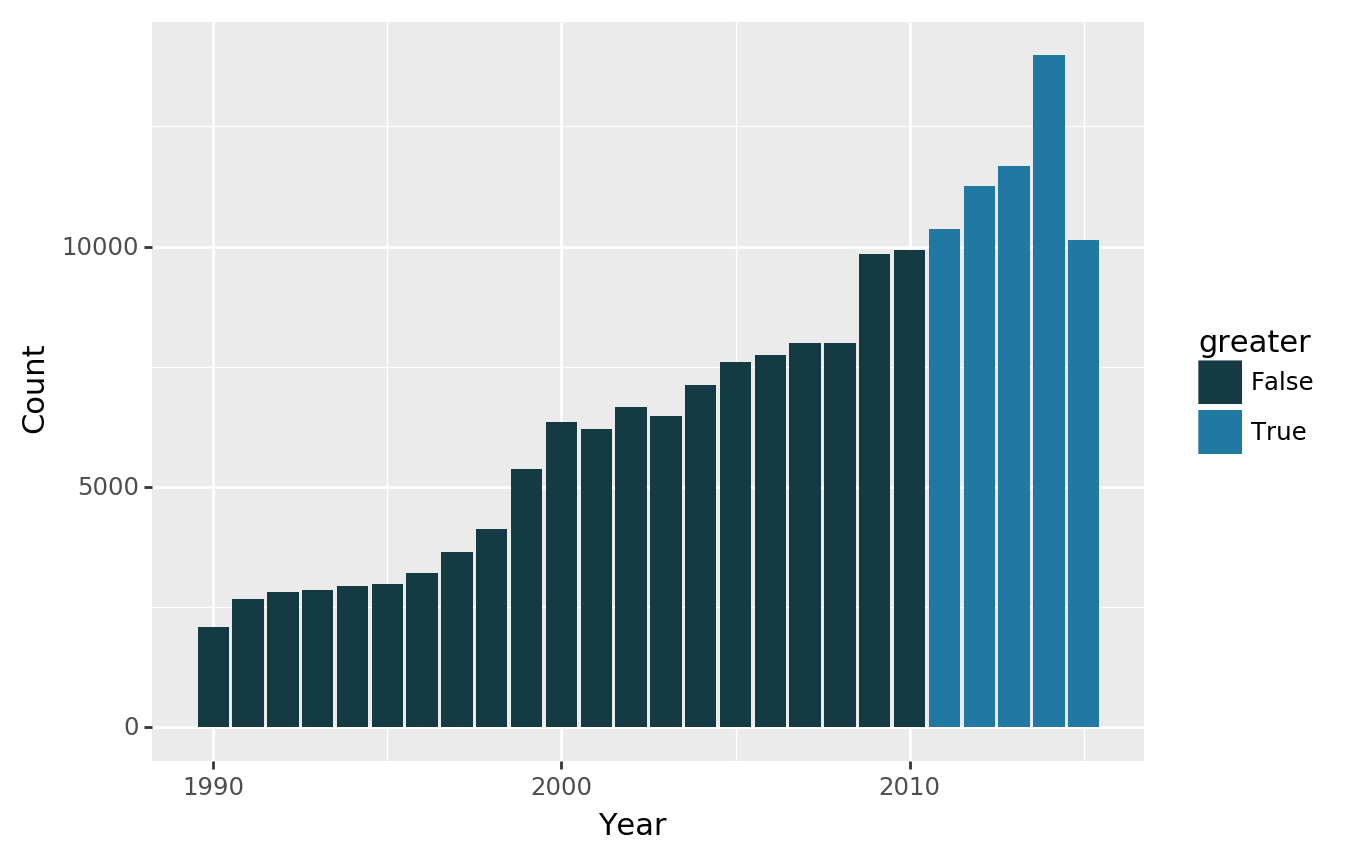

<ggplot: (-9223372029310618375)>

In [8]:
ggplot(aes(x=counts.index, weight="counts", fill="greater"), counts) + geom_bar() + xlab("Year") + ylab("Count") + scale_fill_manual(values=b_color)

연중 사고가 가장 빈번한 달은?

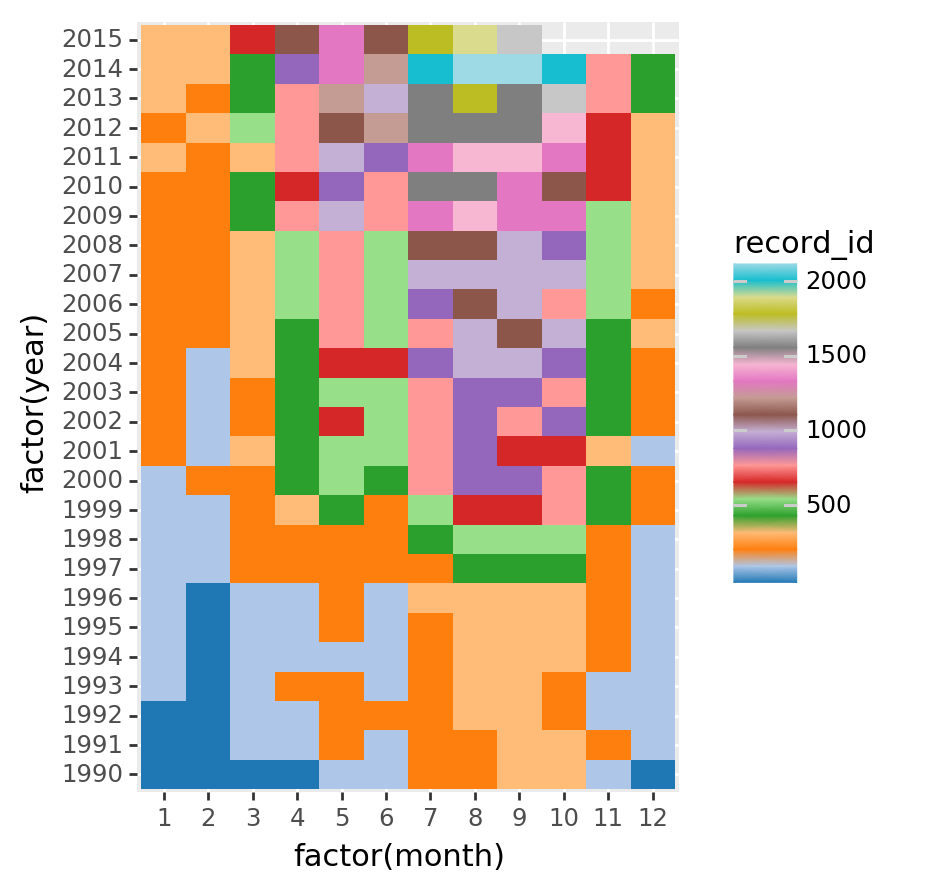

<ggplot: (-9223372036565541323)>

In [9]:
year_month = df.groupby(by=["year", "month"])["record_id"] \
  .aggregate(lambda x: x.value_counts().count()) \
  .reset_index()

(ggplot(year_month, aes('factor(month)', 'factor(year)', fill='record_id'))
 + geom_tile(aes(width=1, height=1))
 + theme(figure_size=(3.5, 5))
 + scale_fill_cmap("tab20")
)

대충 시간의 흐름에 따른 패턴에 대해서 살펴보고 났더니 그 다음으로는 인명 피해가 얼마나 클지가 궁금해진다. 기체 손상이 없었다면(aircraft_damage) 아마도 인명 피해가 없었을 것이라고 생각해도 좋지 않을까?


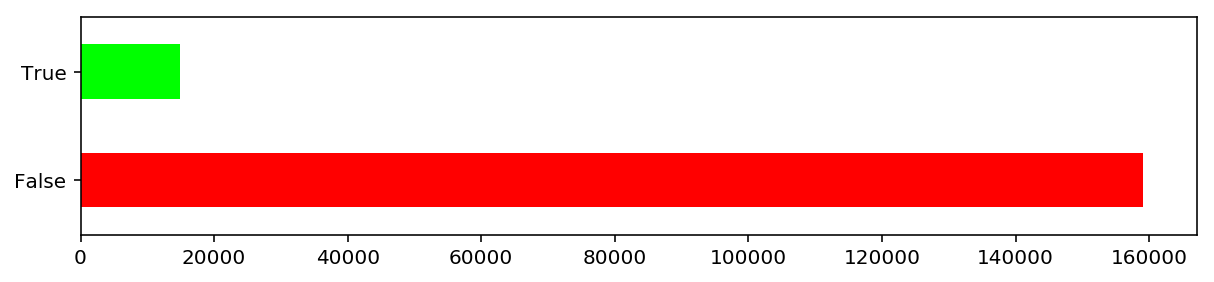

In [10]:
color=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"] * 20
df["aircraft_damage"].value_counts().plot.barh(figsize=(10, 2), color=color);

## 어떤 동물들이 사고를 많이 당할까?

다행스럽게도 기체손상이 없는 경우가 열 배나 많다. 이제는 동물들이 걱정되기 시작했다.

가장 빈번하게 사고를 일으키는 야생동물종은?

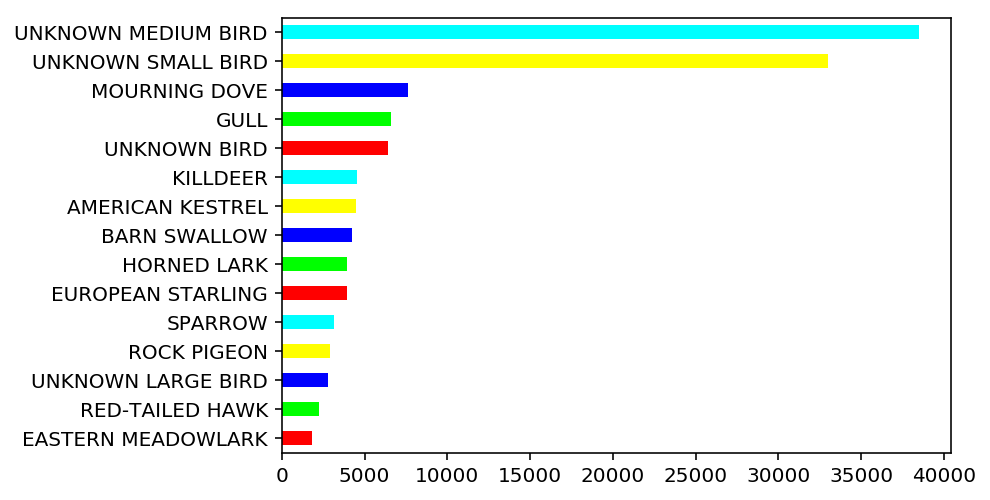

In [11]:
top_species = df["species"].value_counts().sort_values()

color=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"] * 20
top_species.tail(15).plot.barh(color=color);

이륙 전(height == 0)에 발생한 사고만 보면?

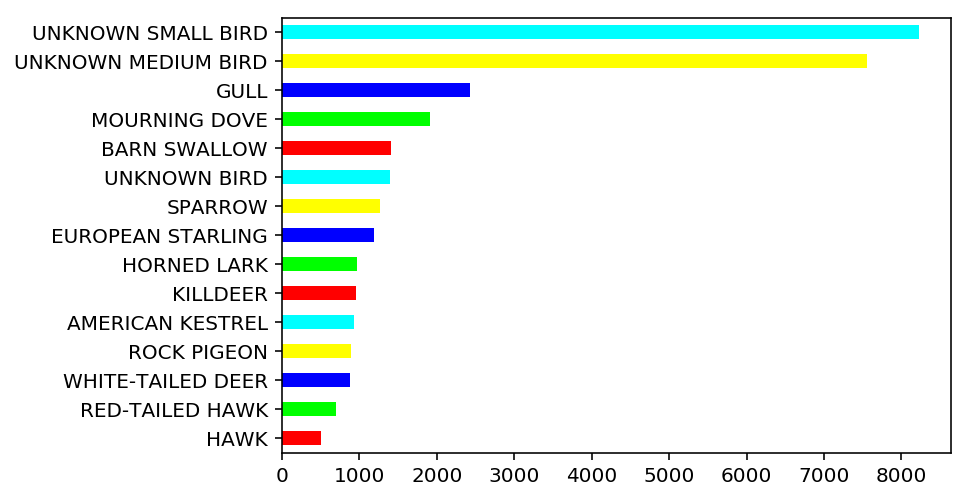

In [12]:
color=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"] * 20
df.loc[df.height == 0, "species"].value_counts().sort_values().tail(15).plot.barh(color=color);

사고 당시 평균 고도를 종별로 나눠서 살펴보면 어떤 결과가 나올까?

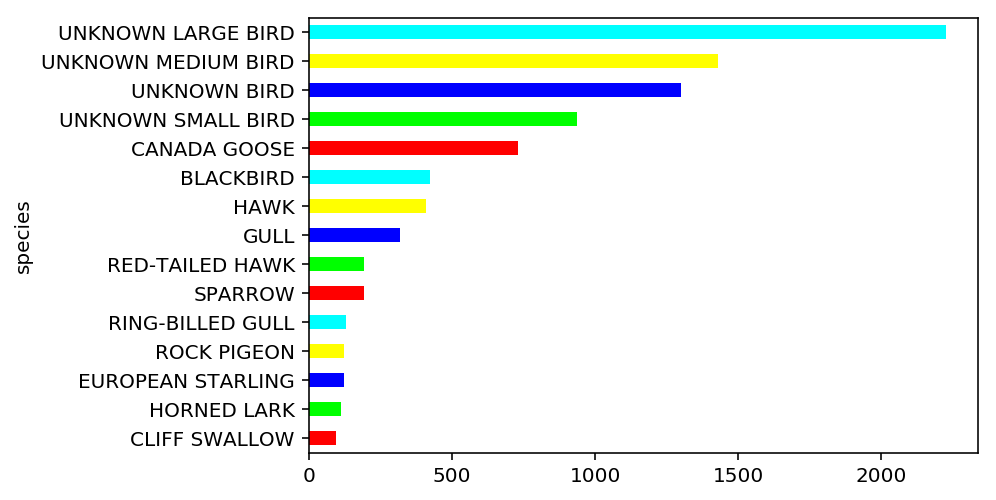

In [13]:
color=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"] * 20

df.loc[df["species"].isin(top_species.tail(20).index)] \
  .groupby(by="species")["height"].mean() \
  .sort_values().tail(15).plot.barh(color=color);

고도, 속도, 기체고장률 사이의 상관 관계는?

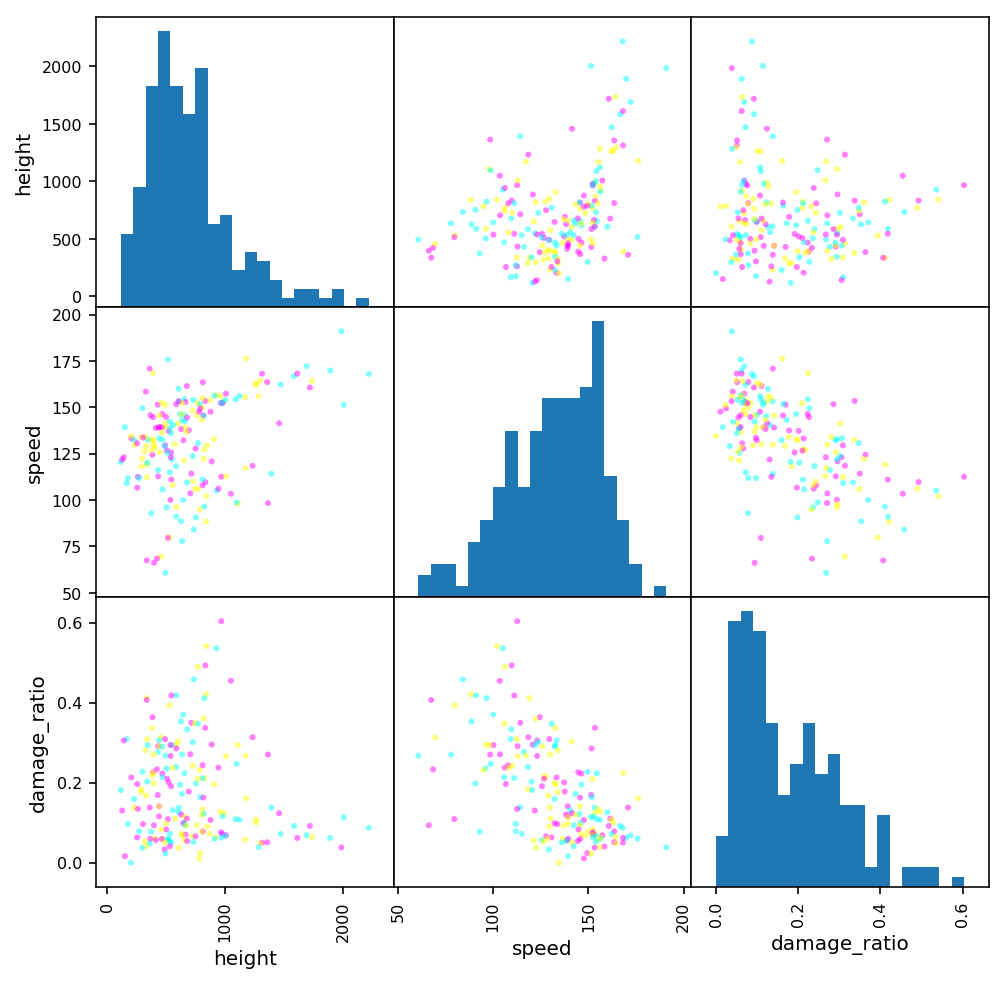

In [14]:
top_aircrafts = df["aircraft"].value_counts().sort_values()

# 기종별 사고 빈도, 평균 고도, 평균 속도, 손상률
damages = df.groupby(by="aircraft")[["record_id", "aircraft_damage", "height", "speed"]].agg({
    "record_id": lambda x: len(x.unique()),
    "aircraft_damage": np.sum,
    "height": np.mean,
    "speed": np.mean,
})
damages["damage_ratio"] = damages["aircraft_damage"] / damages["record_id"]

# 사고 빈도가 50회 이상인 기종에 대한 scatter plot matrix
color=["#FF00FF", "#FFFF00", "#00FFFF"] * 20
pd.plotting.scatter_matrix(
    damages.loc[damages["record_id"] > 50, ["height", "speed", "damage_ratio"]].sort_values("damage_ratio", ascending=False),
    figsize=(8, 8),
    range_padding=0.2,
    hist_kwds={"bins": 20},
    color=color
);